In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import platform

# OSごとのフォント設定
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'MS Gothic'
else:
    plt.rcParams['font.family'] = 'Hiragino Sans'

csv_file_path = 'emdat.csv'

# UTF-8で読み込めない場合はShift-JIS(cp932)で読み込む
try:
    emdat = pd.read_csv(csv_file_path)
except UnicodeDecodeError:
    emdat = pd.read_csv(csv_file_path, encoding='cp932')

print(emdat.head())

  Disaster Subgroup      Disaster Type  Disaster Subtype  ISO  \
0    Meteorological              Storm  Tropical cyclone  USA   
1      Hydrological              Flood   Flood (General)  JAM   
2        Biological           Epidemic     Viral disease  JAM   
3       Geophysical  Volcanic activity          Ash fall  JPN   
4       Geophysical         Earthquake   Ground movement  TUR   

                    Country                        Subregion    Region  \
0  United States of America                 Northern America  Americas   
1                   Jamaica  Latin America and the Caribbean  Americas   
2                   Jamaica  Latin America and the Caribbean  Americas   
3                     Japan                     Eastern Asia      Asia   
4                   Türkiye                     Western Asia      Asia   

   Latitude  Longitude  Start Year  Total Deaths  
0       NaN        NaN        1900        6000.0  
1       NaN        NaN        1900         300.0  
2       NaN

### **チャレンジ 1: 国ごとの死亡者数を可視化**
- **内容**: 指定した国の災害データを使用し、災害タイプごとの死亡者数を棒グラフで可視化する関数を作成してください。

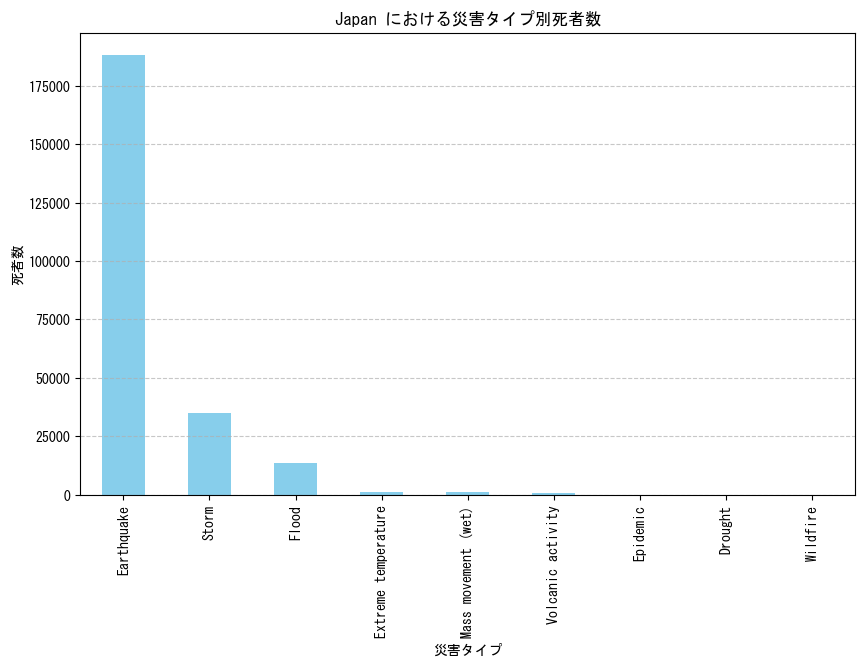

In [10]:
def visualize_deaths_by_country(country_name):
    # 1. 指定した国のデータだけを取り出す
    country_data = emdat[emdat['Country'] == country_name]
    
    # 2. 災害タイプごとに死者数を合計し、多い順に並べる
    death_counts = country_data.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
    
    # 3. グラフを描画
    plt.figure(figsize=(10, 6))
    death_counts.plot(kind='bar', color='skyblue')
    
    plt.title(f'{country_name} における災害タイプ別死者数')
    plt.xlabel('災害タイプ')
    plt.ylabel('死者数')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show() # グラフを表示

# 関数を使う（例：日本）
visualize_deaths_by_country('Japan')

### **チャレンジ 2: 2つの国の死亡者数を比較**
- **内容**: 指定した2つの国の死亡者数を災害タイプごとに比較する関数を作成してください。

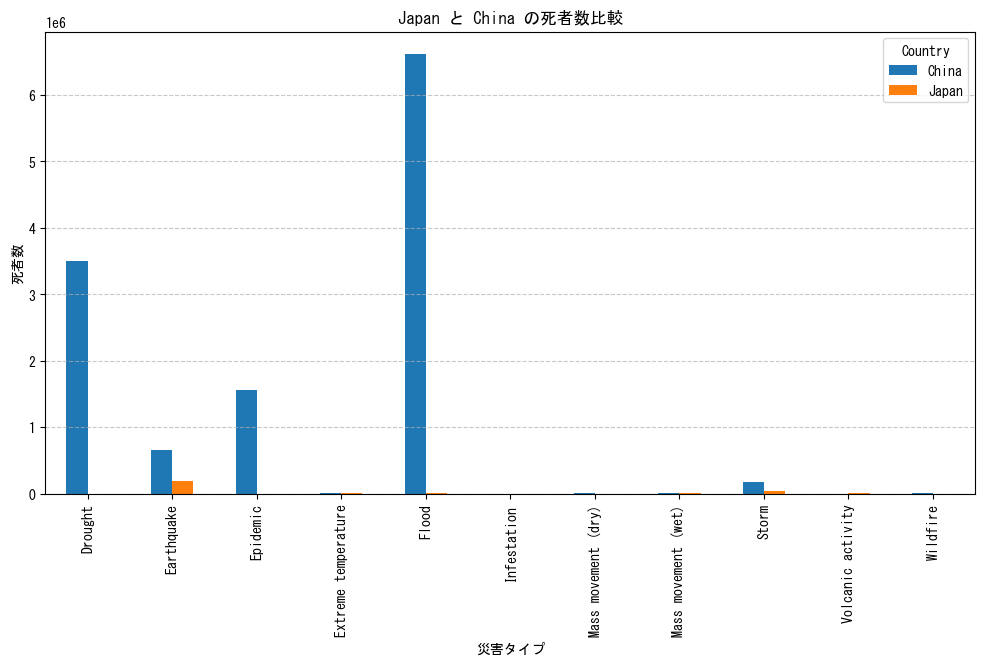

In [7]:
def compare_two_countries(country1, country2):
    # 1. 2つの国のデータを取り出す
    target_data = emdat[emdat['Country'].isin([country1, country2])]
    
    # 2. グラフ用にデータを整形（ピボットテーブル）
    # 行=災害タイプ, 列=国名, 値=死者数
    comparison_data = target_data.pivot_table(
        index='Disaster Type', 
        columns='Country', 
        values='Total Deaths', 
        aggfunc='sum'
    ).fillna(0) # データがない部分は0にする
    
    # 3. グラフを描画
    comparison_data.plot(kind='bar', figsize=(12, 6))
    
    plt.title(f'{country1} と {country2} の死者数比較')
    plt.xlabel('災害タイプ')
    plt.ylabel('死者数')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 関数を使う（例：日本と中国）
compare_two_countries('Japan', 'China')

### **チャレンジ 3: 最も致命的な災害トップNを可視化**
- **内容**: 死亡者数が多い順に、最も致命的な災害を上位N件（例: トップ5）可視化する関数を作成してください。

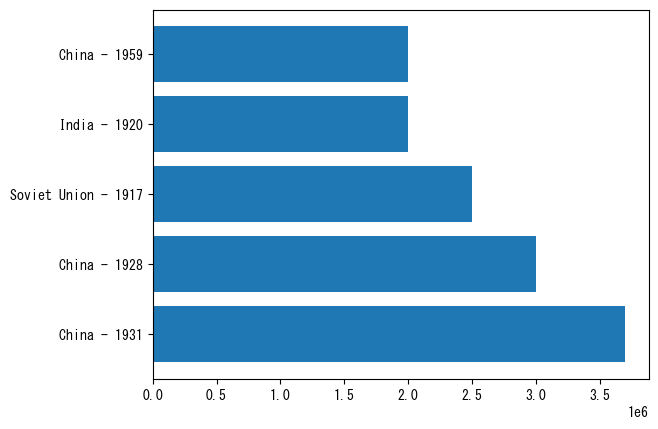

In [9]:
def visualize_top_n_disasters(n):
    # 1. 死者数が多い順に並び替えて、上から n 個とる
    # (列名が Start Year であることに注意)
    top_data = emdat.sort_values('Total Deaths', ascending=False).head(n)
    
    # 2. グラフの「名前」を作る（国名 - 年）
    # 例: "Haiti - 2010"
    names = top_data['Country'] + " - " + top_data['Start Year'].astype(str)
    
    # 3. 横棒グラフを描く
    plt.barh(names, top_data['Total Deaths'])
    plt.show()

# 実行（トップ5を表示）
visualize_top_n_disasters(5)

### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**
- **内容**: 特定の年範囲（例: 2000年から2010年）の死亡者数を可視化する関数を作成してください。

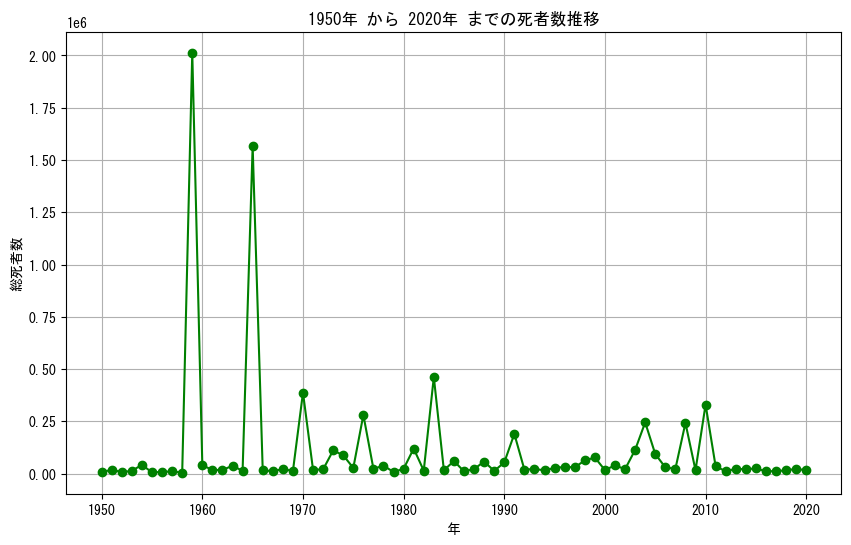

In [6]:
def visualize_deaths_by_year_range(start_year, end_year):
    # データフレームに 'Start Year' があるか確認
    
    year_col = 'Start Year' if 'Start Year' in emdat.columns else 'Year'
    
    # 1. 年の範囲でフィルタリング
    # start_year以上、かつ end_year以下
    period_data = emdat[(emdat[year_col] >= start_year) & (emdat[year_col] <= end_year)]

    # 2. 年ごとに死亡者数を集計
    yearly_deaths = period_data.groupby(year_col)['Total Deaths'].sum()
    
    # 3. 折れ線グラフ
    plt.figure(figsize=(10, 6))
    yearly_deaths.plot(kind='line', marker='o', color='green')
    
    plt.title(f'{start_year}年 から {end_year}年 までの死者数推移')
    plt.xlabel('年')
    plt.ylabel('総死者数')
    plt.grid(True)
    plt.show()

# 実行（例：1950年から2020年）
visualize_deaths_by_year_range(1950, 2020)

### **チャレンジ 5: カスタム可視化を作成**
- **内容**: 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。

--- 地域別分析を開始します ---

■ 南北アメリカ の分析レポート
  - 総死者数: 838,044 人
  - 最大の死因: 地震
------------------------------


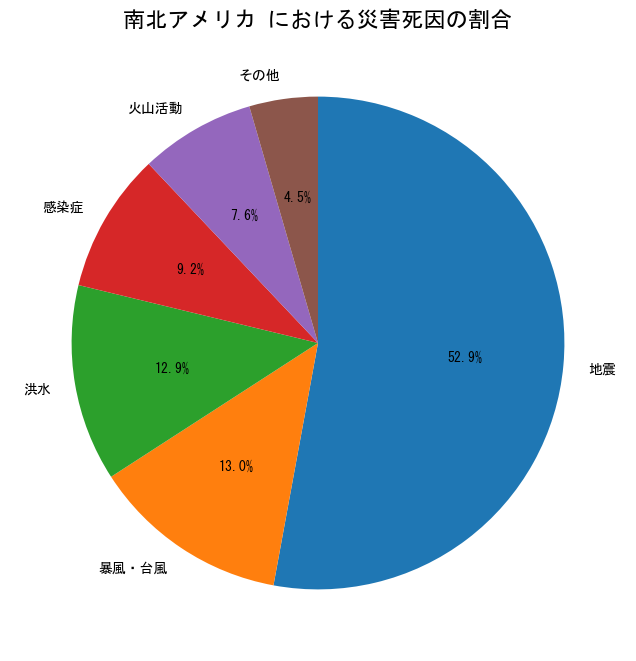

■ アジア の分析レポート
  - 総死者数: 26,079,079 人
  - 最大の死因: 干ばつ
------------------------------


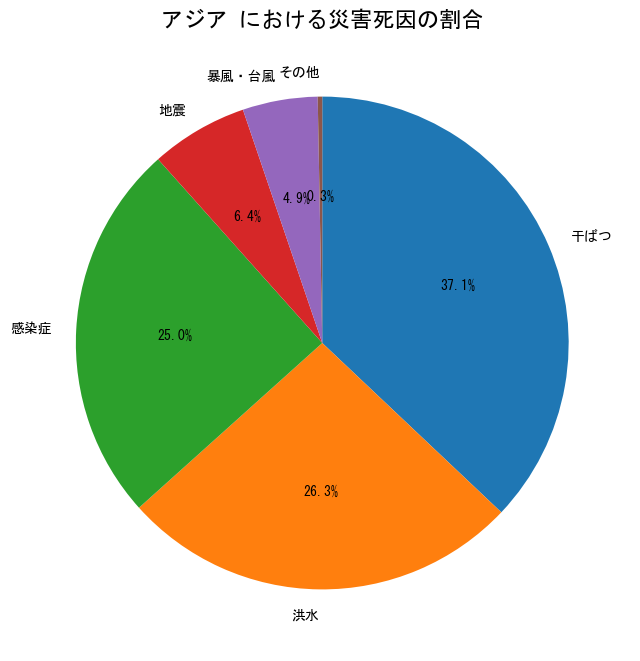

■ アフリカ の分析レポート
  - 総死者数: 1,472,856 人
  - 最大の死因: 干ばつ
------------------------------


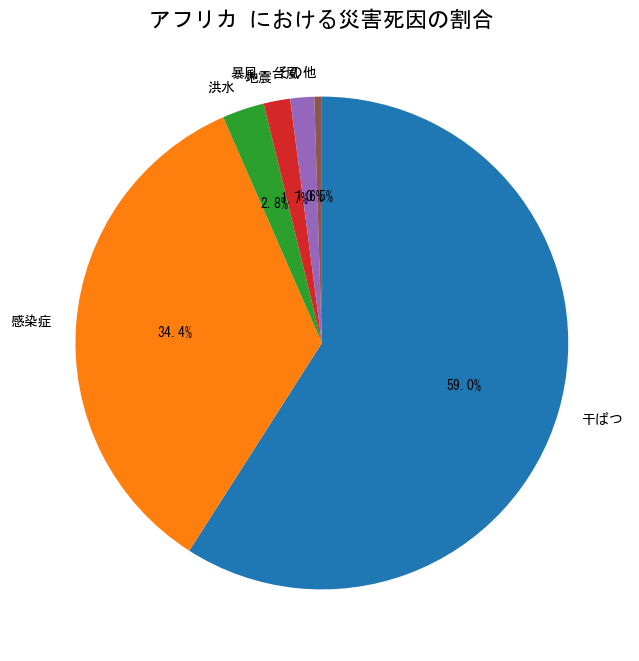

■ ヨーロッパ の分析レポート
  - 総死者数: 4,269,734 人
  - 最大の死因: 感染症
------------------------------


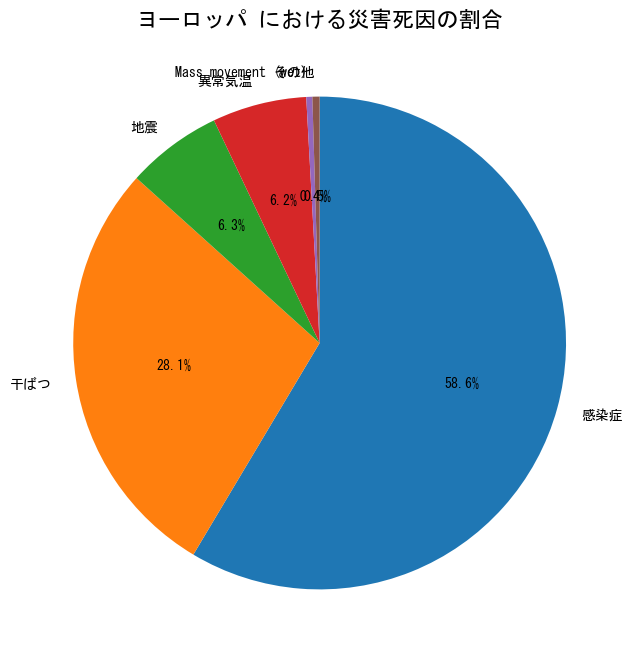

■ オセアニア の分析レポート
  - 総死者数: 22,862 人
  - 最大の死因: 感染症
------------------------------


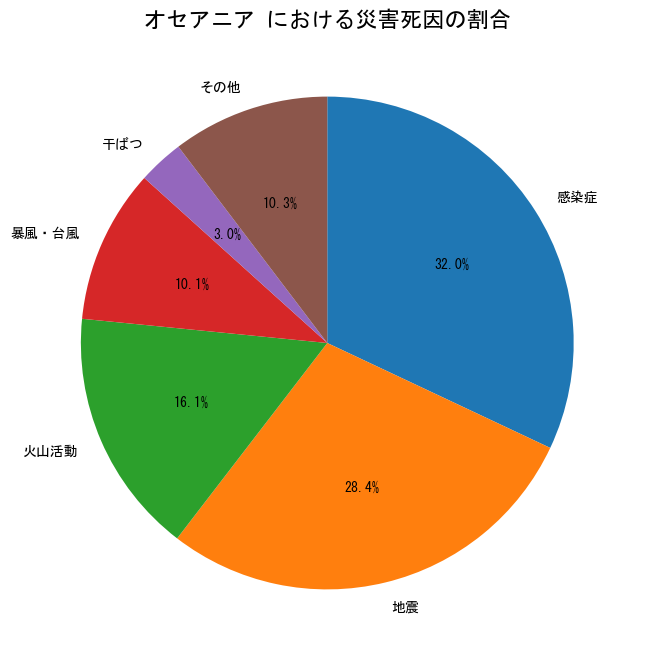

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

#フォント設定
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'MS Gothic'
else:
    plt.rcParams['font.family'] = 'Hiragino Sans'

try:
    emdat = pd.read_csv('emdat.csv')
except:
    emdat = pd.read_csv('emdat.csv', encoding='cp932')

# データの前処理
emdat['Total Deaths'] = pd.to_numeric(emdat['Total Deaths'], errors='coerce').fillna(0)
emdat = emdat.dropna(subset=['Region']) 

#翻訳用
jp_trans = {
    # 地域名
    'Africa': 'アフリカ',
    'Americas': '南北アメリカ',
    'Asia': 'アジア',
    'Europe': 'ヨーロッパ',
    'Oceania': 'オセアニア',
    
    # 災害タイプ
    'Drought': '干ばつ',
    'Earthquake': '地震',
    'Epidemic': '感染症',
    'Extreme temperature': '異常気温',
    'Flood': '洪水',
    'Insect infestation': '虫害',
    'Landslide': '地滑り',
    'Mass movement (dry)': '土砂崩れ(乾燥)',
    'Storm': '暴風・台風',
    'Volcanic activity': '火山活動',
    'Wildfire': '山火事',
    'Impact': '天体衝突',
    'Animal accident': '動物被害'
}


# 関数を作る

def analyze_region_risk_jp(region_name):
    # データを抽出
    region_data = emdat[emdat['Region'] == region_name]
    
    if region_data['Total Deaths'].sum() == 0:
        return

    # 集計する
    death_counts = region_data.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
    
    # 日本語変換
    # 辞書にない言葉はそのまま英語で表示する設定 (.getを使用)
    death_counts.index = [jp_trans.get(name, name) for name in death_counts.index]
    jp_region_name = jp_trans.get(region_name, region_name)

    # --- テキストレポート ---
    total_deaths = int(death_counts.sum())
    top_cause = death_counts.index[0] 
    
    print(f"■ {jp_region_name} の分析レポート")
    print(f"  - 総死者数: {total_deaths:,} 人")
    print(f"  - 最大の死因: {top_cause}")
    print("-" * 30)

    # --- 円グラフ作成 ---
    # 上位5つ以外を「その他」にまとめる
    if len(death_counts) > 5:
        top_5 = death_counts.head(5)
        others_count = death_counts[5:].sum()
        # 「Others」も日本語で「その他」にする
        others = pd.Series([others_count], index=['その他'])
        plot_data = pd.concat([top_5, others])
    else:
        plot_data = death_counts

    plt.figure(figsize=(8, 8))
    # 円グラフの色をきれいにする (cmap='Pastel1')
    plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', 
            startangle=90, counterclock=False) # colorは自動割り当て
    
    plt.title(f'{jp_region_name} における災害死因の割合', fontsize=16)
    plt.show()

# 2. ループで自動実行

unique_regions = emdat['Region'].unique()

print("--- 地域別分析を開始します ---\n")

for region in unique_regions:
    analyze_region_risk_jp(region)